# Neural Networks
## Preparing the TFIDF vectors

In [ ]:
import pandas as pd
import requests
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import sklearn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from functools import reduce

from gutenberg import Gutenberg
# WARNING ! This downloads the WHOLE dataset (using cache if already done)
g = Gutenberg()

In [2]:
catalog = g.getCatalog() 
catalog.head()

,Title,Juvenile fiction,History,Poetry,Politics and gouvernment,Cooking,Mistery,Philosophy,Christian,Love stories,...,Travelling,Correspondence,Adventure,Drama,Biography,Historical fiction,Science fiction,Fantasy fiction,Science,Others
Text#,,,,,,,,,,,,,,,,,,,,,
5,The United States Constitution,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Give Me Liberty or Give Me Death,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Abraham Lincoln's Second Inaugural Address,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Abraham Lincoln's First Inaugural Address,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Alice's Adventures in Wonderland,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# TFIDF

In [7]:
tfidf_vectorizer = TfidfVectorizer(
            input='content',
            analyzer='word',
            stop_words='english',
            ngram_range = (1,1), 
            max_features = 1000,    
            max_df = 0.8, #ignore terms that appear in > than max_df % of docs 
            use_idf=True)

In [8]:
books_content = []
for book_id in tqdm(catalog.index):
    books_content.append( g.getBook(book_id) )

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14769/14769 [01:15<00:00, 195.19it/s]


In [ ]:
tfidf_data = tfidf_vectorizer.fit_transform(books_content)
tfidf_df = pd.DataFrame(tfidf_data.todense(), columns=tfidf_vectorizer.get_feature_names() )
tfidf_df.head()

# Neural network

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-12-01 21:39:42.907709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 21:39:47.172581: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-01 21:39:47.172799: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-01 21:39:47.172807: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [16]:
df = catalog.copy()
#df["id"]=df.index
input_columns = tfidf_df.columns
label_columns = df.columns[1:]
df = pd.concat([df.reset_index(), tfidf_df.reset_index()], axis=1)
df.head()

,Text#,Title,Juvenile fiction,History,Poetry,Politics and gouvernment,Cooking,Mistery,Philosophy,Christian,...,wouldn,wounded,write,wrote,yards,ye,yellow,yesterday,york,youth
0,5,The United States Constitution,0,0,0,1,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.038109,0.000000
1,6,Give Me Liberty or Give Me Death,0,0,0,1,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,8,Abraham Lincoln's Second Inaugural Address,0,0,0,1,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,9,Abraham Lincoln's First Inaugural Address,0,0,0,1,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,11,Alice's Adventures in Wonderland,1,0,0,0,0,0,0,0,...,0.085911,0.0,0.030684,0.016172,0.006404,0.006417,0.0,0.017464,0.000000,0.031512


In [17]:
input_columns

Index(['10', '11', '12', '13', '14', '15', '16', '17', '18', '25',
       ...
       'wouldn', 'wounded', 'write', 'wrote', 'yards', 'ye', 'yellow',
       'yesterday', 'york', 'youth'],
      dtype='object', length=1000)

In [18]:
label_columns

Index(['Juvenile fiction', 'History', 'Poetry', 'Politics and gouvernment',
       'Cooking', 'Mistery', 'Philosophy', 'Christian', 'Love stories',
       'Periodicals', 'Humor', 'Travelling', 'Correspondence', 'Adventure',
       'Drama', 'Biography', 'Historical fiction', 'Science fiction',
       'Fantasy fiction', 'Science', 'Others'],
      dtype='object')

In [19]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=25)
len(df_train),len(df_test)

(11815, 2954)

## A multi-class classifier

In [57]:
X_train, Y_train = df_train[input_columns].to_numpy(), df_train[label_columns].to_numpy()
X_test, Y_test = df_test[input_columns].to_numpy(), df_test[label_columns].to_numpy()

In [58]:
model = keras.Sequential([
        keras.layers.Input(shape=(1000,)), # input shape : number of TFIDF features
        keras.layers.Dense(units=50, activation='relu'),
        keras.layers.Dense(units=50, activation='relu'),
        keras.layers.Dense(units=21, activation='softmax') #sigmoid
    ])

# adam ? rmsprop
# binary loss : binary_crossentropy
# categorical_crossentropy
# tf.keras.losses.MeanSquaredError()
model.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError() , metrics=["accuracy"])


In [59]:
history = model.fit(X_train,Y_train,epochs=20,validation_data=(X_test, Y_test))

Epoch 1/20
370/370 [==============================] - 2s 2ms/step - loss: 0.0476 - accuracy: 0.4105 - val_loss: 0.0393 - val_accuracy: 0.5332
Epoch 2/20
370/370 [==============================] - 1s 2ms/step - loss: 0.0356 - accuracy: 0.5749 - val_loss: 0.0354 - val_accuracy: 0.5843
Epoch 3/20
370/370 [==============================] - 1s 2ms/step - loss: 0.0322 - accuracy: 0.6209 - val_loss: 0.0337 - val_accuracy: 0.5965
Epoch 4/20
370/370 [==============================] - 1s 2ms/step - loss: 0.0303 - accuracy: 0.6415 - val_loss: 0.0328 - val_accuracy: 0.6026
Epoch 5/20
370/370 [==============================] - 1s 2ms/step - loss: 0.0289 - accuracy: 0.6532 - val_loss: 0.0323 - val_accuracy: 0.5978
Epoch 6/20
370/370 [==============================] - 1s 2ms/step - loss: 0.0279 - accuracy: 0.6653 - val_loss: 0.0320 - val_accuracy: 0.5880
Epoch 7/20
370/370 [==============================] - 1s 2ms/step - loss: 0.0271 - accuracy: 0.6738 - val_loss: 0.0320 - val_accuracy: 0.5799
Epoch 

In [60]:
model.predict(np.array([X_test[2]]))

1/1 [==============================] - 0s 48ms/step


array([[2.0688437e-06, 1.8043627e-01, 2.9273087e-06, 8.0921739e-01,
        1.2168944e-07, 1.8366593e-10, 2.3033743e-05, 9.4264578e-07,
        8.3281390e-07, 2.0978143e-05, 5.5222176e-06, 6.3968953e-05,
        3.7907527e-03, 3.4901453e-09, 1.1553135e-05, 6.0526482e-03,
        3.5813282e-04, 5.3890377e-09, 1.1125559e-08, 2.2692374e-08,
        1.2842504e-05]], dtype=float32)

In [61]:
Y_test[2]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

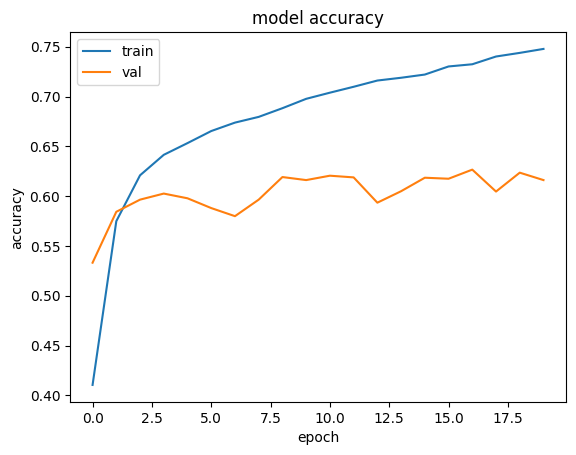

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

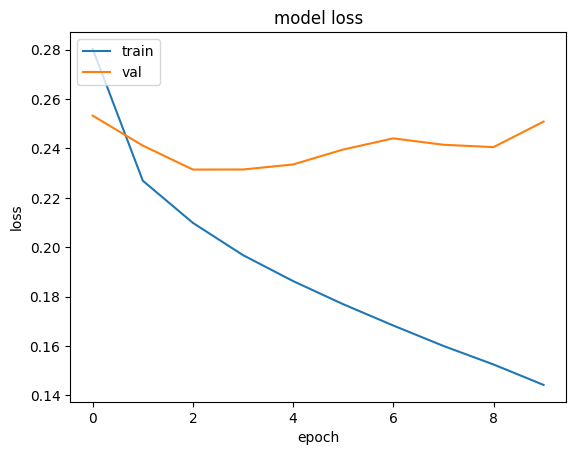

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("overfitting.jpg")
plt.show()

<Figure size 640x480 with 0 Axes>

In [64]:
Y_pred = model.predict(X_test)
Y_pred_threshold = (Y_pred > 0.3).astype(int)

93/93 [==============================] - 0s 750us/step


In [65]:
Y_test

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
Y_pred_threshold

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [67]:
sklearn.metrics.f1_score(Y_test,Y_pred_threshold,average=None)

array([0.80432173, 0.51435407, 0.80291971, 0.73684211, 0.89473684,
       0.72131148, 0.56097561, 0.53684211, 0.50314465, 0.78405316,
       0.75943396, 0.68246445, 0.44444444, 0.30285714, 0.85333333,
       0.62992126, 0.60487805, 0.88578089, 0.66442953, 0.60150376,
       0.27299703])

In [68]:
# Computing F1 score as a function of the chosen threshold

F1_x = np.linspace(0,1,num=200)
F1_y = []


for x in F1_x:
    F1_y.append(sklearn.metrics.f1_score(Y_test,(Y_pred >= x).astype(int),average=None))
    

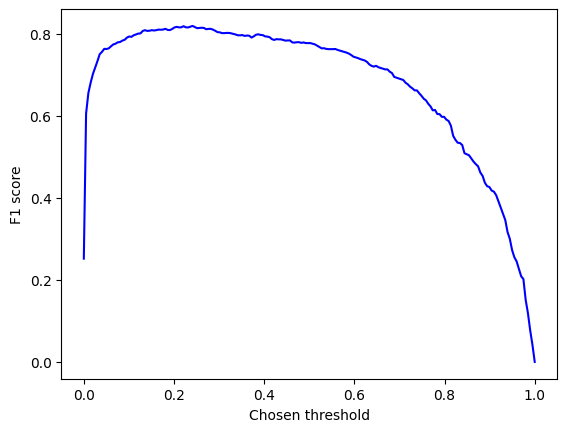

In [93]:
# Plot for one category (i=4)

plt.plot(F1_x,[ e[0] for e in F1_y],"b-")#,linewidth=1,alpha=0.1)
plt.ylabel('F1 score')
plt.xlabel('Chosen threshold')
plt.savefig("nn_f1.png")
plt.show()


In [70]:
print("Category".ljust(35),"best f1 (y)\tcorresponding threshold (x)")
results_multiclass = []
for i in range(21):
    amax = np.argmax([e[i] for e in F1_y])
    results_multiclass.append([label_columns[i],F1_y[amax][i],F1_x[amax]])
    print((str(i)+" "+label_columns[i]).ljust(35),f"{F1_y[amax][i]:.5f}\t{F1_x[amax]:.5f}")
    

Category                            best f1 (y)	corresponding threshold (x)
0 Juvenile fiction                  0.81998	0.24121
1 History                           0.52896	0.14070
2 Poetry                            0.81443	0.51256
3 Politics and gouvernment          0.74172	0.18593
4 Cooking                           0.90909	0.15075
5 Mistery                           0.72480	0.28643
6 Philosophy                        0.59740	0.32161
7 Christian                         0.60829	0.16080
8 Love stories                      0.52121	0.27136
9 Periodicals                       0.81931	0.19095
10 Humor                            0.80000	0.24623
11 Travelling                       0.69469	0.14573
12 Correspondence                   0.44444	0.29146
13 Adventure                        0.48496	0.07538
14 Drama                            0.86435	0.17085
15 Biography                        0.66515	0.15578
16 Historical fiction               0.61468	0.25126
17 Science fiction                  0.90

## One binary classifier for each subject

In [40]:
LABEL_I = 0
Y_train_1 = np.array([[e[LABEL_I]] for e in Y_train])
Y_test_1 = np.array([[e[LABEL_I]] for e in Y_test])

In [41]:
Y_train_1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [79]:
model = keras.Sequential([
        keras.layers.Input(shape=(1000,)), # input shape : number of TFIDF features
        keras.layers.Dense(units=20, activation='relu'),
        keras.layers.Dense(units=10, activation='relu'),
        keras.layers.Dense(units=1, activation='sigmoid') #
    ])

# adam ? rmsprop
# binary loss : 
# categorical_crossentropy
# tf.keras.losses.MeanSquaredError()
model.compile(optimizer="adam", loss="binary_crossentropy" , metrics=["accuracy"])
tf.keras.utils.plot_model (model, "neural_multiclass.jpg", show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [80]:

history = model.fit(X_train,Y_train_1,epochs=10,validation_data=(X_test, Y_test_1))

Epoch 1/10
370/370 [==============================] - 2s 3ms/step - loss: 0.2803 - accuracy: 0.9317 - val_loss: 0.2533 - val_accuracy: 0.9303
Epoch 2/10
370/370 [==============================] - 1s 2ms/step - loss: 0.2270 - accuracy: 0.9338 - val_loss: 0.2412 - val_accuracy: 0.9303
Epoch 3/10
370/370 [==============================] - 1s 2ms/step - loss: 0.2099 - accuracy: 0.9366 - val_loss: 0.2315 - val_accuracy: 0.9299
Epoch 4/10
370/370 [==============================] - 1s 2ms/step - loss: 0.1968 - accuracy: 0.9408 - val_loss: 0.2315 - val_accuracy: 0.9303
Epoch 5/10
370/370 [==============================] - 1s 2ms/step - loss: 0.1863 - accuracy: 0.9440 - val_loss: 0.2335 - val_accuracy: 0.9289
Epoch 6/10
370/370 [==============================] - 1s 2ms/step - loss: 0.1769 - accuracy: 0.9460 - val_loss: 0.2396 - val_accuracy: 0.9282
Epoch 7/10
370/370 [==============================] - 1s 2ms/step - loss: 0.1683 - accuracy: 0.9490 - val_loss: 0.2441 - val_accuracy: 0.9282
Epoch 

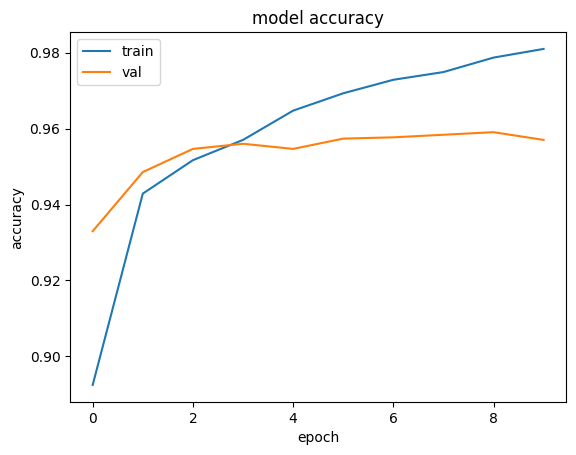

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

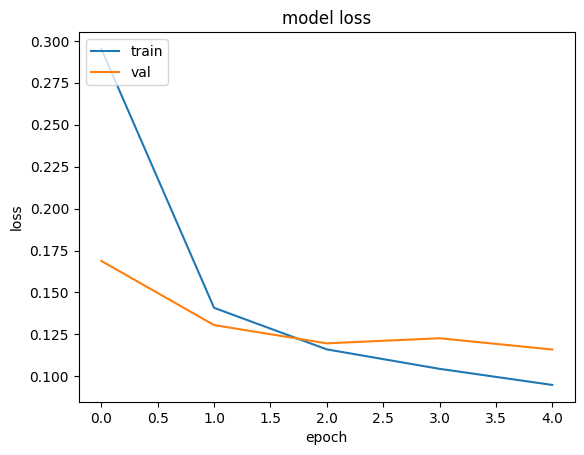

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [50]:
Y_pred_1 = model.predict(X_test)

93/93 [==============================] - 0s 804us/step


In [51]:
Y_pred_1

array([[1.8031562e-03],
       [7.9456695e-05],
       [1.5658939e-06],
       ...,
       [6.5777844e-01],
       [9.5507596e-07],
       [3.9346187e-04]], dtype=float32)

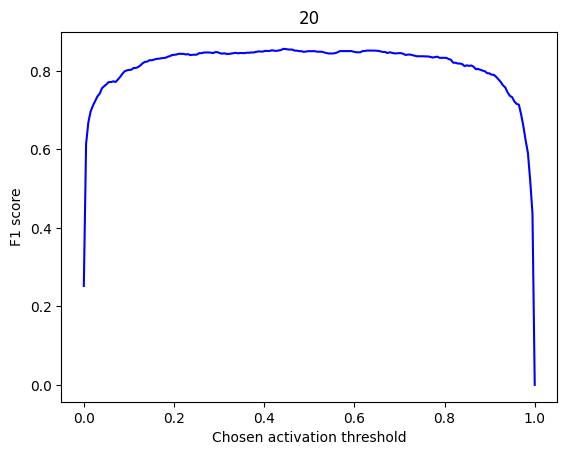

Category                            best f1 (y)	corresponding threshold (x)
0 Juvenile fiction                  0.85581	0.44221


In [52]:
F1_x = np.linspace(0,1,num=200)
F1_y = []

for x in F1_x:
    F1_y.append(sklearn.metrics.f1_score(Y_test_1,(Y_pred_1 >= x).astype(int)))

plt.plot(F1_x,F1_y,"b-")#,linewidth=1,alpha=0.1)
plt.title(i)
plt.ylabel('F1 score')
plt.xlabel('Chosen activation threshold')
plt.show()
amax = np.argmax(F1_y)
print("Category".ljust(35),"best f1 (y)\tcorresponding threshold (x)")
print((str(LABEL_I)+" "+label_columns[LABEL_I]).ljust(35),f"{F1_y[amax]:.5f}\t{F1_x[amax]:.5f}")
    

Work in progress : not working in the loop ... F1 score isn't what I expected

 *** Training for label = Juvenile fiction ***
Epoch 1/20
370/370 [==============================] - 2s 3ms/step - loss: 0.3485 - accuracy: 0.8765 - val_loss: 0.2056 - val_accuracy: 0.9204
Epoch 2/20
370/370 [==============================] - 1s 2ms/step - loss: 0.1606 - accuracy: 0.9374 - val_loss: 0.1401 - val_accuracy: 0.9448
Epoch 3/20
370/370 [==============================] - 1s 2ms/step - loss: 0.1294 - accuracy: 0.9481 - val_loss: 0.1286 - val_accuracy: 0.9509
Epoch 4/20
370/370 [==============================] - 1s 2ms/step - loss: 0.1175 - accuracy: 0.9534 - val_loss: 0.1232 - val_accuracy: 0.9536
Epoch 5/20
370/370 [==============================] - 1s 2ms/step - loss: 0.1099 - accuracy: 0.9571 - val_loss: 0.1200 - val_accuracy: 0.9557
Epoch 6/20
370/370 [==============================] - 1s 2ms/step - loss: 0.1028 - accuracy: 0.9602 - val_loss: 0.1177 - val_accuracy: 0.9557
Epoch 7/20
370/370 [==============================] - 1s 2ms/step - loss: 0.0969 - accuracy: 0.9639 -

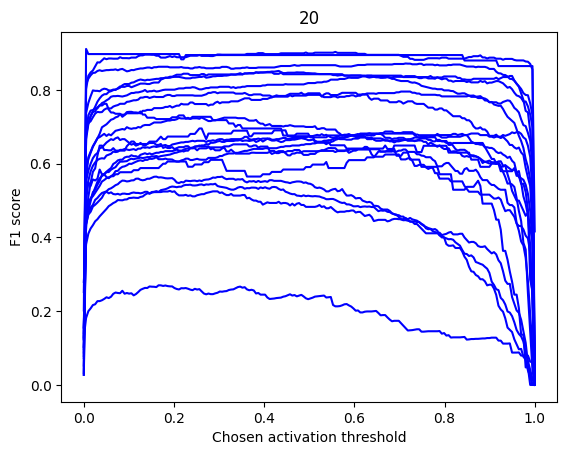

In [53]:
results_binary = []
for LABEL_I in range(21):
    print(f" *** Training for label = {label_columns[LABEL_I]} ***")
    Y_train_1 = np.array([[e[LABEL_I]] for e in Y_train])
    Y_test_1 = np.array([[e[LABEL_I]] for e in Y_test])
    
    model = keras.Sequential([
            keras.layers.Input(shape=(1000,)), # input shape : number of TFIDF features
            keras.layers.Dense(units=20, activation='relu'),
            keras.layers.Dense(units=10, activation='relu'),
            keras.layers.Dense(units=1, activation='sigmoid') #
        ])

    model.compile(optimizer="adam", loss="binary_crossentropy" , metrics=["accuracy"])
    history = model.fit(X_train,Y_train_1,epochs=20,validation_data=(X_test, Y_test_1))
    Y_pred_1 = model.predict(X_test)

    F1_x = np.linspace(0,1,num=200)
    F1_y = []

    for x in F1_x:
        F1_y.append(sklearn.metrics.f1_score(Y_test_1,(Y_pred_1 >= x).astype(int)))

    amax = np.argmax(F1_y)
    
    
    plt.plot(F1_x,F1_y,"b-")#,linewidth=1,alpha=0.1)
    plt.title(i)
    plt.ylabel('F1 score')
    plt.xlabel('Chosen activation threshold')
    plt.show
    
    results_binary.append([label_columns[LABEL_I],F1_y[amax],F1_x[amax]])
    
    

In [56]:
print("Category".ljust(35),"best f1 (y)\tcorresponding threshold (x)")
for (LABEL_I),(a,b,c) in enumerate(results_binary):
    print((str(LABEL_I)+" "+a).ljust(35),f"{b:.5f}\t{c:.5f}")

Category                            best f1 (y)	corresponding threshold (x)
0 Juvenile fiction                  0.85172	0.43216
1 History                           0.54563	0.29146
2 Poetry                            0.79576	0.70352
3 Politics and gouvernment          0.79259	0.48241
4 Cooking                           0.91139	0.00503
5 Mistery                           0.72544	0.26131
6 Philosophy                        0.69565	0.25628
7 Christian                         0.67143	0.07538
8 Love stories                      0.52632	0.19095
9 Periodicals                       0.87187	0.71357
10 Humor                            0.83871	0.62814
11 Travelling                       0.68106	0.83920
12 Correspondence                   0.64935	0.68844
13 Adventure                        0.56506	0.30653
14 Drama                            0.84768	0.38191
15 Biography                        0.68254	0.63317
16 Historical fiction               0.64945	0.25628
17 Science fiction                  0.90

# Comparison between a classifier for each category and only one multiclass classifier

In [86]:

print("Category".ljust(35),"multiclass F1\tbinary F1")
print()
bin_f1 = np.array([results_binary[i][1] for i in range(21)])
mult_f1 = np.array([results_multiclass[i][1] for i in range(21)])
for i in range(21):
    label = results_binary[i][0]
    print((str(label)+" "+a).ljust(35),f"{mult_f1[i]:.3f}\t\t{bin_f1[i]:.3f}")
print()
print(("AVERAGE").ljust(35),f"{np.average(mult_f1):.3f}\t\t{np.average(bin_f1):.3f}")
print(("STANDARD DEVIATION").ljust(35),f"{np.std(mult_f1):.3f}\t\t{np.std(bin_f1):.3f}")

Category                            multiclass F1	binary F1

Juvenile fiction Others             0.820		0.852
History Others                      0.529		0.546
Poetry Others                       0.814		0.796
Politics and gouvernment Others     0.742		0.793
Cooking Others                      0.909		0.911
Mistery Others                      0.725		0.725
Philosophy Others                   0.597		0.696
Christian Others                    0.608		0.671
Love stories Others                 0.521		0.526
Periodicals Others                  0.819		0.872
Humor Others                        0.800		0.839
Travelling Others                   0.695		0.681
Correspondence Others               0.444		0.649
Adventure Others                    0.485		0.565
Drama Others                        0.864		0.848
Biography Others                    0.665		0.683
Historical fiction Others           0.615		0.649
Science fiction Others              0.905		0.903
Fantasy fiction Others              0.696		0.687
Science 